In [21]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
MODEL_PATH = './ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model'

detect_fn = tf.saved_model.load(MODEL_PATH)

In [23]:
def load_image_into_numpy_array(path):
	"""Load an image from file into a numpy array."""
	img = cv2.imread(path)
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	return img

def preprocess_image(image_np):
	"""Preprocess the image for the model."""
	input_tensor = tf.convert_to_tensor(image_np)
	input_tensor = input_tensor[tf.newaxis, ...]
	return input_tensor


In [24]:
image_path = './person.jpg'
image_np = load_image_into_numpy_array(image_path)
input_tensor = preprocess_image(image_np)

In [25]:
print(image_np.shape)

(676, 1200, 3)


In [26]:
print(input_tensor)

tf.Tensor(
[[[[182 113  38]
   [212 144  69]
   [248 185 108]
   ...
   [  1   1   1]
   [  2   2   2]
   [  2   2   2]]

  [[183 114  39]
   [213 145  70]
   [249 186 109]
   ...
   [  1   1   1]
   [  2   2   2]
   [  2   2   2]]

  [[183 114  39]
   [213 145  70]
   [249 186 109]
   ...
   [  1   1   1]
   [  2   2   2]
   [  2   2   2]]

  ...

  [[227 135  48]
   [243 151  66]
   [242 150  67]
   ...
   [205 138  83]
   [208 141  86]
   [209 143  85]]

  [[238 146  59]
   [249 157  72]
   [243 151  68]
   ...
   [201 134  79]
   [205 138  83]
   [207 141  83]]

  [[243 151  64]
   [252 160  75]
   [243 151  68]
   ...
   [198 131  76]
   [200 133  78]
   [201 135  77]]]], shape=(1, 676, 1200, 3), dtype=uint8)


In [27]:
detections = detect_fn(input_tensor)

In [28]:
# Process the detection results
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy() 
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# Detection classes and detection boxes
detection_classes = detections['detection_classes']
detection_boxes = detections['detection_boxes']

In [32]:
def visualize_detections_with_threshold(image_np, detection_boxes, detection_classes, detection_scores, threshold=0.5):
    image_np_with_annotations = image_np.copy()
    for i in range(len(detection_boxes)):
        if detection_classes[i] == 1 and detection_scores[i] >= threshold:  # Assuming class 1 is 'person'
            box = detection_boxes[i] * np.array([image_np.shape[0], image_np.shape[1], image_np.shape[0], image_np.shape[1]])
            image_np_with_annotations = cv2.rectangle(image_np_with_annotations, (int(box[1]), int(box[0])), (int(box[3]), int(box[2])), (255, 0, 0), 2)
    plt.figure(figsize=(12, 8))
    plt.imshow(image_np_with_annotations)
    plt.show()


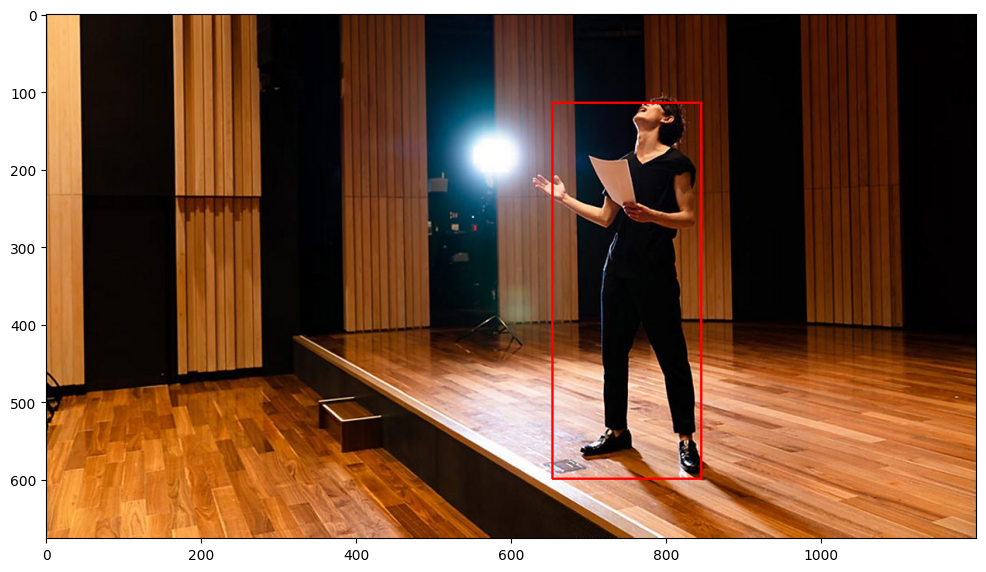

In [33]:
visualize_detections_with_threshold(image_np, detection_boxes, detection_classes, detections['detection_scores'], threshold=0.5)